# Import tools

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import requests
import time
pd.options.display.max_colwidth = 350

# Import data

In [2]:
all_posts = pd.read_csv('all_posts.csv')
all_posts.shape

(2000, 2)

In [50]:
all_posts.head()

,subreddit,title,title_char_length,title_word_count
0,nasa,"Marshall Spinoffs Increase 3D Printing Capabilities, Tackle Foot Odor",69,9
1,nasa,NASA's Perseverance rover has the same processor as an iMac from 1998,69,12
2,nasa,Possible heat shield in perseverance panorama?,46,6
3,nasa,Dirty talk during space walk,28,5
5,nasa,Possible Heat shield in Perseverance panorama?,46,6


In [51]:
all_posts.tail()

,subreddit,title,title_char_length,title_word_count
1995,Astronomy,Celestron 100az or Orion Starblast II?,38,6
1996,Astronomy,Why does the sun shine much brighter on earth than from space satellites or the moon?,85,16
1997,Astronomy,NASA Citizen Scientist. Contribute to actual NASA Missions,58,8
1998,Astronomy,Are black holes real or fake,28,6
1999,Astronomy,What is the difference between these 2 binoculars?,50,8


In [4]:
all_posts['title'].nunique()

1930

### There are 1930 unique titles out of 2000, so there are some duplicates that need to be cleaned

In [5]:
all_posts[all_posts.duplicated(['title'], keep=False)].head(40)

,subreddit,title
2,nasa,Possible heat shield in perseverance panorama?
4,nasa,Possible heat shield in perseverance panorama?
70,nasa,"A stripped redesign of graphic decoding Mars parachute message ""DARE MIGHTY THINGS"""
71,nasa,"A stripped redesign of graphic decoding Mars parachute message ""DARE MIGHTY THINGS"""
78,nasa,A Collection of the Latest Achievements and Stories from Deep Space Exploration
82,nasa,Perseverance
125,nasa,"A Chat with THE Dr. Barry Barish || Spotlight Lecture || Shaastra, IIT Madras"
148,nasa,Life on Mars is the perfect song to recap the Perseverance mission
149,nasa,Life on Mars is the perfect song to recap the Perseverance mission
166,nasa,New Science Podcast: Interview with NASA Engineer Tracy Drain


In [6]:
all_posts[all_posts.duplicated(['title'], keep=False)].tail(40)

,subreddit,title
1406,Astronomy,Orion Nebula
1410,Astronomy,Starship from SpaceX is going to have a new landing sytem after two explosions
1432,Astronomy,The Jack-o-Lantern Nebula
1439,Astronomy,"Dinosaurs, consider yourselves avenged..."
1440,Astronomy,"Dinosaurs, consider yourselves avenged..."
1491,Astronomy,The California Nebula
1492,Astronomy,The California Nebula
1493,Astronomy,TESS Discovers New Worlds in a River of Stars
1515,Astronomy,"Perseverance, The Journey To Mars"
1521,Astronomy,Crescent Moon composite with animated twinkling stars


### If I had more time I would look further into this

In [7]:
all_posts.drop_duplicates('title', keep='first', inplace=True)
all_posts.shape

(1930, 2)

### Making new columns with different text features

In [8]:
all_posts['title_char_length'] = all_posts['title'].str.len()

In [9]:
all_posts['title_word_count'] = [len(i.split()) for i in all_posts['title']]

In [10]:
all_posts.shape

(1930, 4)

In [46]:
all_posts['title'].str.count('NASA').count()

1930

In [48]:
## do after the cohort and find a way to make it work
# all_posts.loc['Astronomy']

In [11]:
all_posts.head(3)

,subreddit,title,title_char_length,title_word_count
0,nasa,"Marshall Spinoffs Increase 3D Printing Capabilities, Tackle Foot Odor",69,9
1,nasa,NASA's Perseverance rover has the same processor as an iMac from 1998,69,12
2,nasa,Possible heat shield in perseverance panorama?,46,6


### Finding the longest and shortest posts and with the most and least words

In [12]:
all_posts.sort_values(by='title_char_length', ascending=False)[['title']].head(5)

,title
177,"NASA's Swift Helps Tie Neutrino to Star-shredding Black Hole. For only the 2nd time, astronomers have linked an elusive high-energy neutrino to an object outside our galaxy. Using ground &amp; space-based facilities, including NASA’s Swift, they traced the neutrino to a black hole tearing apart a star."
1420,"Perseverance will start roving around Mars in just a few short days. Equipped with a rock-blasting laser, microphones, a helicopter, and much more, the rover it will hunt for ancient life, cache samples for return to Earth, and pave the way for human explorers by plucking oxygen from Mars' thin air."
1175,"Rosette nebula before and after better image processing. Starting to learn star removal and process the image and add the stars back without over exposure. Svbony sv48 90mm Canon eos 2000D / T7 Skywatcher Az gti go-to mount in equatorial mode Home made polar scope Various filters CLS, UHC, UV / IR"
831,"STS-51L Flight Director Jay Greene and Assistant Flight Director Lee Briscoe react following the breakup of Challenger on January 28, 1986. 17 years later Greene and Briscoe both watched from the Director's suite at Mission Control as another team of flight controllers lost contact with Columbia."
809,"When the Senate approved SLS their requirements were so specific you’d think they were rocket engineers. They wanted 130 tons of lift with an upper stage, liquid fuel engines, solid rocket motor engines, Shuttle and Ares 1 tech reused. ""It was like an aerospace industry wish list—because it was."""


In [13]:
all_posts.sort_values(by='title_char_length', ascending=True)[['title']].head(5)

,title
1334,🌔
1004,m2
1003,m42
1645,Rocc
1034,Meh?


In [14]:
all_posts.sort_values(by='title_word_count', ascending=False)[['title']].head(5)

,title
971,"A few years back my papaw gifted me some trinkets from when he worked with NASA in the 60's, I've worn the Gemini for a while (which is why it looks so clean). I would love to know if they have any history to them or were just bought in a random gift shop. Any information appreciated!"
548,I believe they built a tesseract. And that the Pyramid of Giza is the tip of such pyramid the even aligns with the end of Orian. And above stonehenge matches the craft I saw as I was driving west from winnemuca nevada. Raise Giza in the air so that the base surface reaches the 360 around Earth
1337,I just started out some astrophotography but... is mars supposed to twinkle? I saw that mars was near the moon on skywalk and I could see a bright dot in the sky + there were no other stated bright stars near it- am I zooming onto the wrong thing? Someone please explain how this works
36,"Is it true that it is impossible to sterilize 100% of some parts of the Rovers' instruments that go to Mars? And as we once saw on the outside of an ISS window some form of life proliferating, what are the real possibilities of having terrestrial microscopic life evolving on Mars right now?"
838,"Fun Fact: While Neil Armstrong was the first person to walk on the moon, 22 year old Karl Jacobs was the first to land on the moon in 1967, over a year before the Apollo 11 Mission. Unfortunately due to extreme conditions Karl never made it back down to Earth (Colorized Second Photo)"


In [15]:
all_posts.sort_values(by='title_word_count', ascending=True)[['title']].head(5)

,title
445,PERSEVERANCE
1203,questioooon
37,Mars.
40,Raptor
188,Aliens


# Visualizations

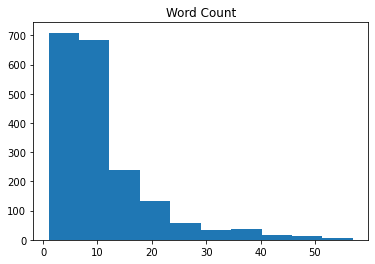

In [52]:
plt.hist(all_posts.title_word_count)
plt.title('Word Count');

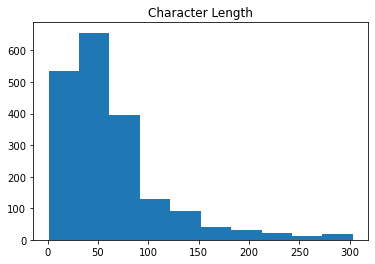

In [53]:
plt.hist(all_posts.title_char_length)
plt.title('Character Length');

# Modeling Process and setting up various models

In [18]:
X = all_posts['title']
y = all_posts['subreddit']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Preprocessing

In [20]:
cv = CountVectorizer()

In [21]:
X_train_cv = cv.fit_transform(X_train)

In [22]:
X_test_cv = cv.transform(X_test)

In [23]:
pd.DataFrame(X_train_cv.todense())

,0,1,2,3,4,5,6,7,8,9,...,3594,3595,3596,3597,3598,3599,3600,3601,3602,3603
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,0,0,0,0
1443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X_train_df['nasa'].value_counts()

0    1212
1     221
2      13
3       1
Name: nasa, dtype: int64

In [24]:
cv.get_feature_names()[1000:1015]

['discussion',
 'disintegrated',
 'disks',
 'disney',
 'display',
 'displaying',
 'disqualify',
 'dissonance',
 'distance',
 'distant',
 'disturb',
 'dive',
 'diy',
 'do',
 'dob']

In [26]:
X_train_df = pd.DataFrame(X_train_cv.todense(), columns=cv.get_feature_names())

In [27]:
X_train_df.head()

,000,000016,002,01,02,03,06,10,100,1000,...,علي,كوكب,مساجد,موسى,يؤم,يا,ℂ𝕠𝕡𝕪,ℙ𝕒𝕤𝕥𝕖,𝔽𝕠𝕟𝕥,𝕒𝕟𝕕
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_train_df.sum(axis=0).sort_values(ascending=False).head(15)

the             719
of              345
to              296
nasa            250
in              246
and             229
on              202
mars            195
is              187
perseverance    178
for             166
my              140
this            140
with            124
from            120
dtype: int64

## Fitting a model, which may turn out to be the main model

In [29]:
mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train)

mnb.score(X_train_cv, y_train), mnb.score(X_test_cv, y_test)

(0.9308914996544575, 0.8115942028985508)

## Other models and pipelines to be considered

In [30]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])


pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9308914996544575, 0.8115942028985508)

In [31]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9668279198341396, 0.8053830227743272)

In [32]:
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB())
])

pipe_params = {
    'cv__stop_words': ['english', None],
    'cv__max_features': [2000, 3000, 4000, 5000, None],
    'cv__min_df': [1, 2, 3, 10, 100],
    'cv__max_df': [.90, .95, 1.0],
    'cv__ngram_range': [(1,1), (1,2)]
}

## Gridsearching for the best parameters for a model

In [33]:
gs = GridSearchCV(pipe, 
                  pipe_params, 
                  cv=5)

In [34]:
gs.fit(X_train, y_train);

In [35]:
gs.best_params_

{'cv__max_df': 0.9,
 'cv__max_features': 2000,
 'cv__min_df': 2,
 'cv__ngram_range': (1, 1),
 'cv__stop_words': None}

In [36]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.8928818244644091, 0.8012422360248447)

## Creating a confusion matrix that shows how many accurate predictions and wrong predictions are in the testing data

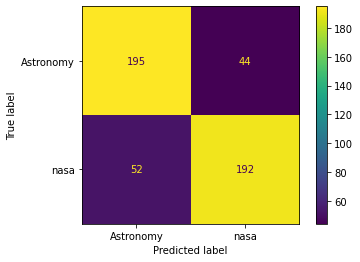

In [37]:
preds = gs.predict(X_test)
plot_confusion_matrix(gs, X_test, y_test)

## Surprisingly, there are not as many false predictions as anticipated even though Nasa appears in both subreddits, meaning that this model is much more accurate than first thought to be

In [39]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

   Astronomy       0.79      0.82      0.80       239
        nasa       0.81      0.79      0.80       244

    accuracy                           0.80       483
   macro avg       0.80      0.80      0.80       483
weighted avg       0.80      0.80      0.80       483

